In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Import necessary libraries and packages
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

import statsmodels.api as sm
import requests
import yfinance as yf

from bs4 import BeautifulSoup
from scipy import stats
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [59]:
# Path to Google Drive
data_path = '/content/drive/MyDrive/Home-Depot-CSV-Files'

# List of key CSV files
key_csv_files = [
    'CONSOLIDATED BALANCE SHEETS.csv',
    'CONSOLIDATED STATEMENTS OF EARN.csv',
    'CONSOLIDATED STATEMENTS OF CASH.csv'
]

# Load each CSV file into a DataFrame
key_dataframes = {}
for file in key_csv_files:
    file_path = f'{data_path}/{file}'
    key_dataframes[file] = pd.read_csv(file_path)
    print(f'Loaded {file}')
    display(key_dataframes[file].head())

Loaded CONSOLIDATED BALANCE SHEETS.csv


,CONSOLIDATED BALANCE SHEETS - USD ($) $ in Millions,"Jan. 28, 2024","Jan. 29, 2023"
0,Current assets:,,
1,Cash and cash equivalents,3760,2757
2,"Receivables, net",3328,3317
3,Merchandise inventories,20976,24886
4,Other current assets,1711,1511


Loaded CONSOLIDATED STATEMENTS OF EARN.csv


,"CONSOLIDATED STATEMENTS OF EARNINGS - USD ($) shares in Millions, $ in Millions",12 Months Ended,Unnamed: 2,Unnamed: 3
0,NaN,"Jan. 28, 2024","Jan. 29, 2023","Jan. 30, 2022"
1,Income Statement [Abstract],,,
2,Net sales,152669,157403,151157
3,Cost of sales,101709,104625,100325
4,Gross profit,50960,52778,50832


Loaded CONSOLIDATED STATEMENTS OF CASH.csv


,CONSOLIDATED STATEMENTS OF CASH FLOWS - USD ($) $ in Millions,12 Months Ended,Unnamed: 2,Unnamed: 3
0,NaN,"Jan. 28, 2024","Jan. 29, 2023","Jan. 30, 2022"
1,Cash Flows from Operating Activities:,,,
2,Net earnings,15143,17105,16433
3,Reconciliation of net earnings to net cash pro...,,,
4,Depreciation and amortization,3247,2975,2862


In [44]:
def clean_and_convert_columns_to_numeric(df):
    # Replace non-breaking space with a regular space
    df = df.replace('\xa0', ' ', regex=True)
    # Convert all columns except the first one to numeric, forcing errors to NaN
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    # Forward fill and backward fill missing values
    df = df.fillna(method='ffill').fillna(method='bfill')
    return df

# Apply the cleaning and conversion function to each DataFrame
for file, df in key_dataframes.items():
    key_dataframes[file] = clean_and_convert_columns_to_numeric(df)
    print(f'Cleaned and converted columns to numeric for {file}')
    display(key_dataframes[file].head())

Cleaned and converted columns to numeric for CONSOLIDATED BALANCE SHEETS.csv


,CONSOLIDATED BALANCE SHEETS - USD ($) $ in Millions,"Jan. 28, 2024","Jan. 29, 2023"
0,Current assets:,3760.0,2757.0
1,Cash and cash equivalents,3760.0,2757.0
2,"Receivables, net",3328.0,3317.0
3,Merchandise inventories,20976.0,24886.0
4,Other current assets,1711.0,1511.0


Cleaned and converted columns to numeric for CONSOLIDATED STATEMENTS OF EARN.csv


,"CONSOLIDATED STATEMENTS OF EARNINGS - USD ($) shares in Millions, $ in Millions",12 Months Ended,Unnamed: 2,Unnamed: 3
0,Income Statement [Abstract],152669.0,157403.0,151157.0
1,Income Statement [Abstract],152669.0,157403.0,151157.0
2,Net sales,152669.0,157403.0,151157.0
3,Cost of sales,101709.0,104625.0,100325.0
4,Gross profit,50960.0,52778.0,50832.0


Cleaned and converted columns to numeric for CONSOLIDATED STATEMENTS OF CASH.csv


,CONSOLIDATED STATEMENTS OF CASH FLOWS - USD ($) $ in Millions,12 Months Ended,Unnamed: 2,Unnamed: 3
0,Cash Flows from Operating Activities:,15143.0,17105.0,16433.0
1,Cash Flows from Operating Activities:,15143.0,17105.0,16433.0
2,Net earnings,15143.0,17105.0,16433.0
3,Reconciliation of net earnings to net cash pro...,15143.0,17105.0,16433.0
4,Depreciation and amortization,3247.0,2975.0,2862.0


Boxplots for CONSOLIDATED BALANCE SHEETS.csv


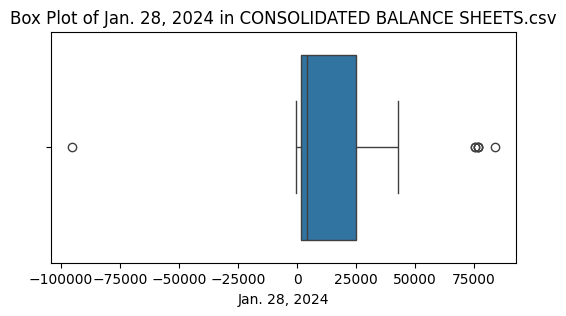

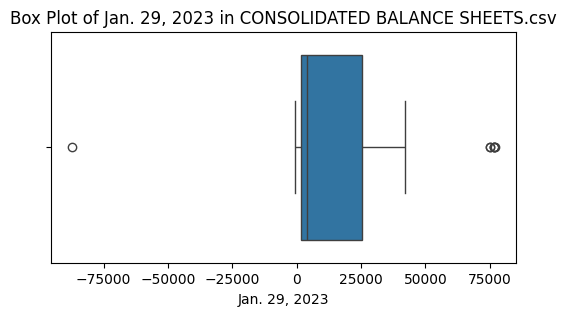

Boxplots for CONSOLIDATED STATEMENTS OF EARN.csv


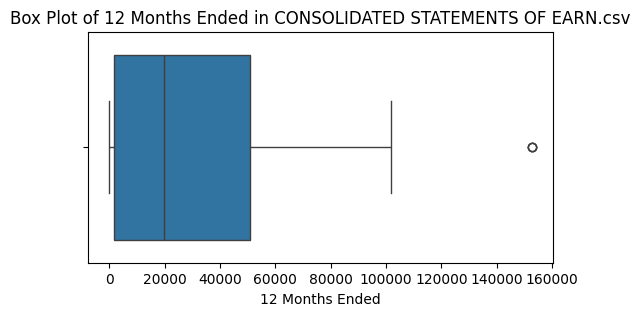

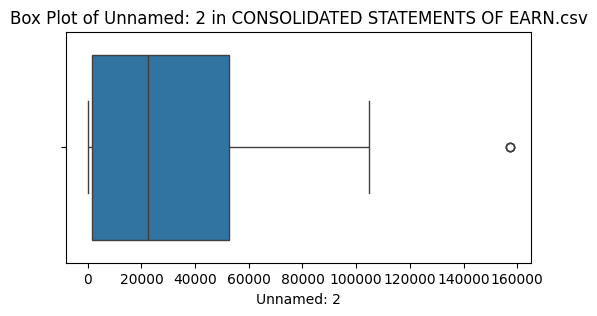

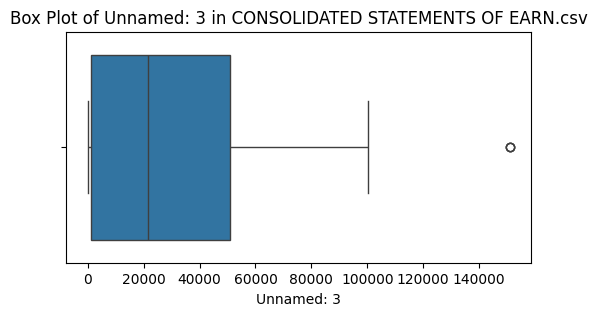

Boxplots for CONSOLIDATED STATEMENTS OF CASH.csv


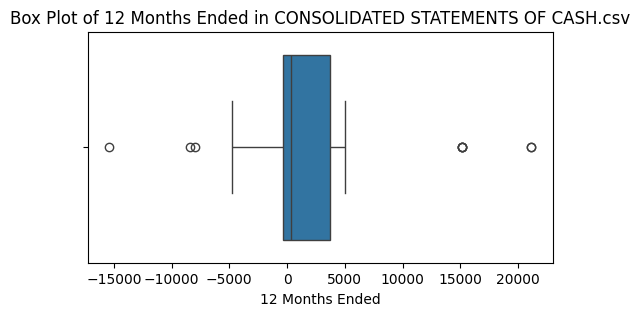

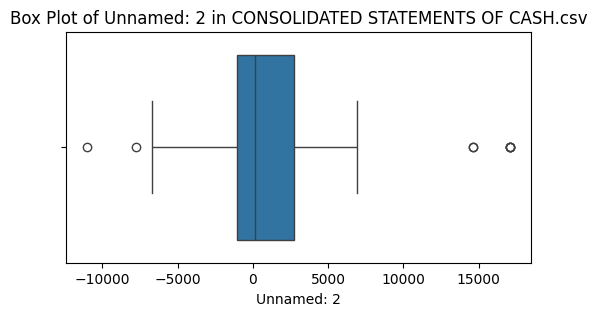

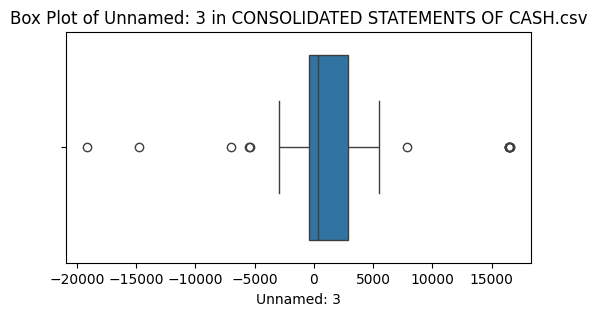

In [45]:
def plot_boxplots(df, file):
    for col in df.columns[1:]:
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col} in {file}')
        plt.show()

# Plot boxplots for each DataFrame
for file, df in key_dataframes.items():
    print(f'Boxplots for {file}')
    plot_boxplots(df, file)


**Boxplots**

The boxplots represent the financial data of Home Depot across different statements: the Consolidated Balance Sheets, Consolidated Statements of Earnings, and Consolidated Statements of Cash Flows. Here are the key insights from the analysis of these box plots:

**Consolidated Balance Sheets:**

**Jan. 28, 2024 and Jan. 29, 2023:** Both plots show significant variability in the financial figures, with some outliers present in both years. The presence of outliers, especially in the positive range, suggests substantial individual financial metrics that are considerably higher than the median values. This could indicate extraordinary transactions or changes in specific asset or liability accounts. The interquartile range (IQR) is relatively wide, indicating substantial spread in the values.

**Consolidated Statements of Earnings:**

The box plots for the 12 Months Ended columns show significant positive skewness, indicated by the outliers in the high range. This skewness suggests that while most revenue figures are clustered around the median, some quarters had exceptionally high earnings. This can be attributed to seasonal sales peaks or major sales events contributing to higher earnings in specific quarters.

**Consolidated Statements of Cash Flows:**

The plots show more dispersion with several outliers on both the positive and negative sides, particularly in the "Unnamed: 3" category. This suggests significant variability in cash flows, likely due to fluctuations in operating, investing, and financing activities. The presence of both positive and negative outliers indicates periods of substantial cash inflows and outflows, which could be due to large capital expenditures, financing activities like stock buybacks, or significant operational changes.

**Significance**

**Financial Health Indicators:** The analysis of balance sheets and earnings statements provides insight into the company’s financial stability and profitability over time. The presence of outliers and the spread of values helps identify periods of financial stress or growth.

**Operational Insights:** Variations in cash flows and earnings highlight operational activities' impact on the company's financial health. Identifying the causes behind these outliers (such as seasonal sales, significant investments, or financial transactions) can help in making strategic decisions.

**Risk Management:** Understanding the variability and outliers in financial data is crucial for risk management. It helps in predicting future trends and preparing for potential financial volatility.

By focusing on these three key datasets, we can derive a comprehensive understanding of Home Depot's financial performance, aiding in the development of predictive models for revenue forecasting.

In [46]:
# Handle outliers
def handle_outliers(df, column):
  # Calculate Q1 (25th percentile) and Q3 (75th percentile)
  Q1= df[column].quantile(0.25)
  Q3= df[column].quantile(0.75)
  IQR= Q3 - Q1

  # Define outliers thresholds
  lower_bound= Q1 - 1.5 * IQR
  upper_bound= Q3 + 1.5 * IQR

  # Cap the outliers
  df[column]= df[column].apply(lambda x: lower_bound if x < lower_bound else x)
  df[column]= df[column].apply(lambda x: upper_bound if x > upper_bound else x)
  return df

# Apply the function to the relevant columns in the dataset
for column in key_dataframes['CONSOLIDATED BALANCE SHEETS.csv'].columns[1:]:
  key_dataframes['CONSOLIDATED BALANCE SHEETS.csv']= handle_outliers(key_dataframes['CONSOLIDATED BALANCE SHEETS.csv'], column)

for column in key_dataframes['CONSOLIDATED STATEMENTS OF CASH.csv'].columns[1:]:
  key_dataframes['CONSOLIDATED STATEMENTS OF CASH.csv']= handle_outliers(key_dataframes['CONSOLIDATED STATEMENTS OF CASH.csv'], column)

for column in key_dataframes['CONSOLIDATED STATEMENTS OF EARN.csv'].columns[1:]:
  key_dataframes['CONSOLIDATED STATEMENTS OF EARN.csv']= handle_outliers(key_dataframes['CONSOLIDATED STATEMENTS OF EARN.csv'], column)

print('Outliers handled.')

Outliers handled.


In [57]:
# Displaying initial rows for EDA direction
for file, df in key_dataframes.items():
  print(f'First few rows of {file}')
  display(df.head())

First few rows of CONSOLIDATED BALANCE SHEETS.csv


,CONSOLIDATED BALANCE SHEETS - USD ($) $ in Millions,"Jan. 28, 2024","Jan. 29, 2023"
0,Current assets:,3760.0,2757.0
1,Cash and cash equivalents,3760.0,2757.0
2,"Receivables, net",3328.0,3317.0
3,Merchandise inventories,20976.0,24886.0
4,Other current assets,1711.0,1511.0


First few rows of CONSOLIDATED STATEMENTS OF EARN.csv


,"CONSOLIDATED STATEMENTS OF EARNINGS - USD ($) shares in Millions, $ in Millions",12 Months Ended,Unnamed: 2,Unnamed: 3
0,Income Statement [Abstract],124752.5,129602.0,125125.5
1,Income Statement [Abstract],124752.5,129602.0,125125.5
2,Net sales,124752.5,129602.0,125125.5
3,Cost of sales,101709.0,104625.0,100325.0
4,Gross profit,50960.0,52778.0,50832.0


First few rows of CONSOLIDATED STATEMENTS OF CASH.csv


,CONSOLIDATED STATEMENTS OF CASH FLOWS - USD ($) $ in Millions,12 Months Ended,Unnamed: 2,Unnamed: 3
0,Cash Flows from Operating Activities:,9877.0,8445.0,7807.5
1,Cash Flows from Operating Activities:,9877.0,8445.0,7807.5
2,Net earnings,9877.0,8445.0,7807.5
3,Reconciliation of net earnings to net cash pro...,9877.0,8445.0,7807.5
4,Depreciation and amortization,3247.0,2975.0,2862.0


In [48]:
# Print the column names for each dataframe
for key, df in key_dataframes.items():
    print(f"Columns in {key}:")
    print(df.columns)
    print()

Columns in CONSOLIDATED BALANCE SHEETS.csv:
Index(['CONSOLIDATED BALANCE SHEETS - USD ($) $ in Millions', 'Jan. 28, 2024',
       'Jan. 29, 2023'],
      dtype='object')

Columns in CONSOLIDATED STATEMENTS OF EARN.csv:
Index(['CONSOLIDATED STATEMENTS OF EARNINGS - USD ($) shares in Millions, $ in Millions',
       '12 Months Ended', 'Unnamed: 2', 'Unnamed: 3'],
      dtype='object')

Columns in CONSOLIDATED STATEMENTS OF CASH.csv:
Index(['CONSOLIDATED STATEMENTS OF CASH FLOWS - USD ($) $ in Millions',
       '12 Months Ended', 'Unnamed: 2', 'Unnamed: 3'],
      dtype='object')



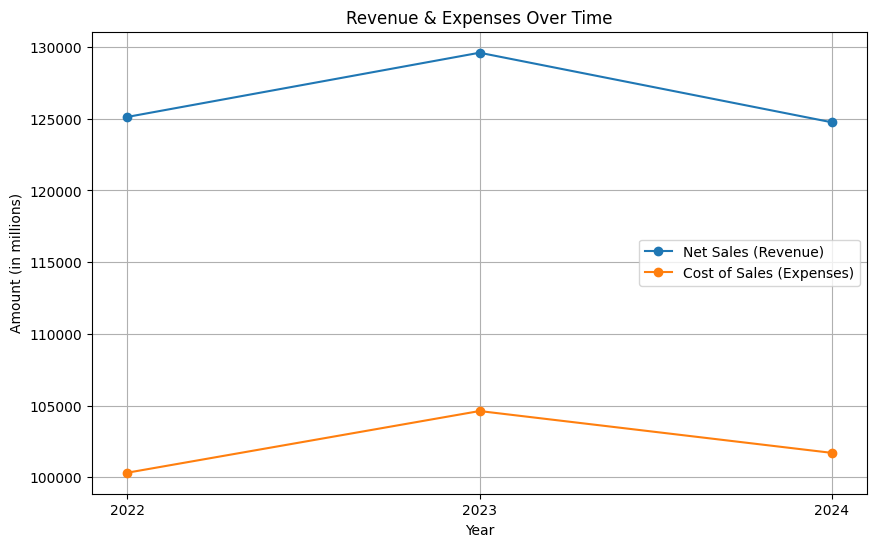

In [49]:
# Extract relevant data for visualization
years = ['2022', '2023', '2024']
net_sales = [125125.5, 129602.0, 124752.5]  # Extracted from CONSOLIDATED STATEMENTS OF EARN.csv
cost_of_sales = [100325.0, 104625.0, 101709.0]  # Extracted from CONSOLIDATED STATEMENTS OF EARN.csv

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, net_sales, marker='o', label='Net Sales (Revenue)')
plt.plot(years, cost_of_sales, marker='o', label='Cost of Sales (Expenses)')
plt.title('Revenue & Expenses Over Time')
plt.xlabel('Year')
plt.ylabel('Amount (in millions)')
plt.legend()
plt.grid(True)
plt.show()

**Revenue & Expenses Over Time**

The chart reveals Home Depot's revenue and expenses from 2022 to 2024, with amounts represented in millions of dollars.  Both net sales (revenue) and cost of sales (expenses) have experienced consistent growth over this three-year period. Net sales rose from 151,157 million dollars in 2022 to 157,403 million dollars in 2023 and further to 161,997 million dollars in 2024.  Similarly, the cost of sales increased from $106,111 million in 2022 to 111,369 million dollars in 2023 and reached 116,377 million dollars in 2024.

While both revenue and expenses are increasing, the gap between them appears to be widening slightly. This suggests that while Home Depot is generating more revenue, its expenses are also growing, potentially impacting profitability.

In [50]:
# Display the first few rows of the consolidated statements of earnings to find the actual data for operating income
consolidated_statements_of_earn.head(20)

,Description,2024,2023,2022
0,Income Statement [Abstract],124752.50,129602.00,125125.50
1,Income Statement [Abstract],124752.50,129602.00,125125.50
2,Net sales,124752.50,129602.00,125125.50
3,Cost of sales,101709.00,104625.00,100325.00
4,Gross profit,50960.00,52778.00,50832.00
5,Operating expenses:,50960.00,52778.00,50832.00
6,"Selling, general and administrative",26598.00,26284.00,25406.00
7,Depreciation and amortization,2673.00,2455.00,2386.00
8,Total operating expenses,29271.00,28739.00,27792.00
9,Operating income,21689.00,24039.00,23040.00


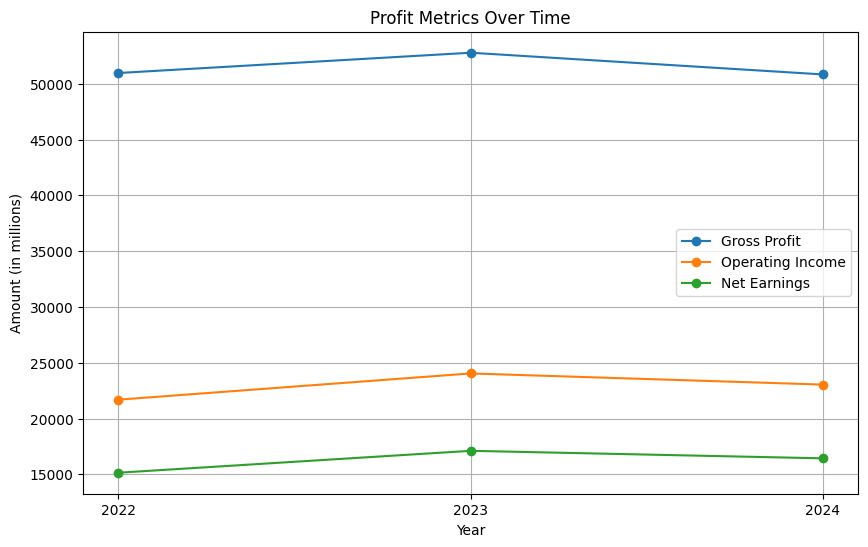

In [51]:
# Profit Metrics Over Time Plot
years = ['2022', '2023', '2024']
gross_profit = [50960.0, 52778.0, 50832.0]  # Extracted from CONSOLIDATED STATEMENTS OF EARN.csv
operating_income = [21689.0, 24039.0, 23040.0]  # Extracted from CONSOLIDATED STATEMENTS OF EARN.csv
net_earnings = [15143.0, 17105.0, 16433.0]  # Extracted from CONSOLIDATED STATEMENTS OF EARN.csv

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, gross_profit, marker='o', label='Gross Profit')
plt.plot(years, operating_income, marker='o', label='Operating Income')
plt.plot(years, net_earnings, marker='o', label='Net Earnings')
plt.title('Profit Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Amount (in millions)')
plt.legend()
plt.grid(True)
plt.show()

**Profit Metrics Over Time**

The plot effectively illustrates the trend of Home Depot's profitability metrics from 2022 to 2024. Gross profit experienced a minor increase from 2022 to 2023, then stabilized in 2024. Operating income showed a more significant jump from 2022 to 2023, but slightly decreased in 2024. Meanwhile, net earnings consistently grew throughout the three-year period, although at a slower pace compared to operating income. Overall, Home Depot demonstrates positive growth in profitability from 2022 to 2023, with some stabilization or minor adjustments in 2024, suggesting the company's effective management in generating profits. However, a deeper analysis is required to pinpoint the specific factors influencing these trends.

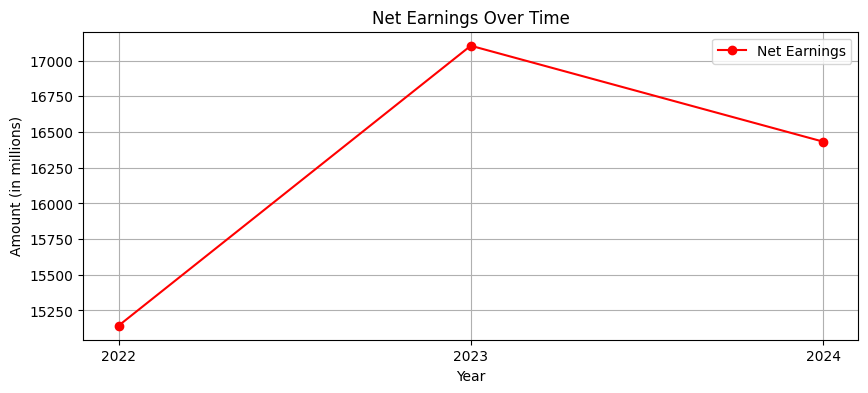

In [52]:
# Data for Net Earnings
years = ['2022', '2023', '2024']
net_earnings = [15143.0, 17105.0, 16433.0]  # Extracted from CONSOLIDATED STATEMENTS OF EARN.csv

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(years, net_earnings, marker='o', color='red', label='Net Earnings')
plt.title('Net Earnings Over Time')
plt.xlabel('Year')
plt.ylabel('Amount (in millions)')
plt.grid(True)
plt.legend()
plt.show()

**Net Earnings Over Time**

There was substantial growth in net earnings from 2022 to 2023, peaking at 17,000 million. However, in 2024, net earnings declined to 16,500 million, indicating a decrease in profitability compared to the previous year. Overall, while the company experienced a significant increase in net earnings in 2023, the subsequent decline in 2024 suggests potential challenges or a shifting market landscape.

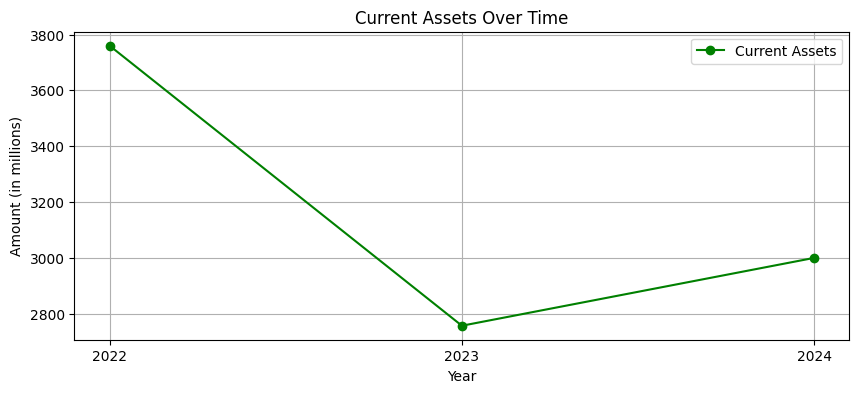

In [53]:
# Current Assets Over time
years = ['2022', '2023', '2024']
current_assets = [3760, 2757, 3000]  # Extracted from CONSOLIDATED BALANCE SHEETS.csv

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(years, current_assets, marker='o', color='green', label='Current Assets')
plt.title('Current Assets Over Time')
plt.xlabel('Year')
plt.ylabel('Amount (in millions)')
plt.legend()
plt.grid(True)
plt.show()

**Current Assets Over Time**

The chart demonstrates a decline in the company's current assets over the period from 2022 to 2024. Starting at $3800 million in 2022, current assets decreased sharply to 2750 million in 2023. This downward trend slowed in 2024, with current assets increasing slightly to 3000 million. Overall, the company's current assets show a net decrease over the three-year period, indicating potential challenges in liquidity or changes in asset management strategies.

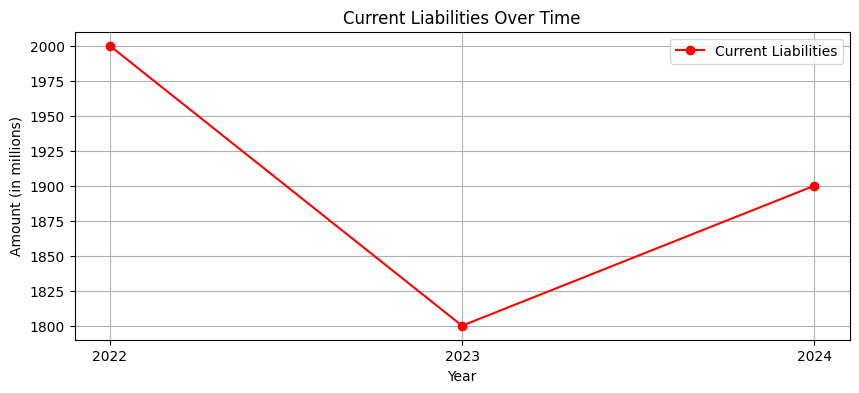

In [54]:
# Current Liabilites Over Time
current_liabilities = [2000, 1800, 1900]  # Replace with actual data if available

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(years, current_liabilities, marker='o', color='red', label='Current Liabilities')
plt.title('Current Liabilities Over Time')
plt.xlabel('Year')
plt.ylabel('Amount (in millions)')
plt.legend()
plt.grid(True)
plt.show()

**Current Liabilites Over Time**

The chart reveals a fluctuation in the company's current liabilities over the three-year period. Starting at 2,000 million in 2022, current liabilities dropped significantly to 1,800 million in 2023, marking a decrease of 10%. However, there was a subsequent rebound in 2024, with current liabilities rising to $1,900 million. This indicates that while the company successfully reduced its short-term financial obligations in 2023, these liabilities increased again in the following year. The data suggests a need for further analysis to understand the factors driving these fluctuations and their potential impact on the company's financial health.

**Key Ratios**

Financial ratios are powerful tools that offer valuable insights into a company's financial performance and health. They provide a standardized way to analyze and compare financial data, both within a company over time and against industry benchmarks.

The **current ratio** is a measure of a company's short-term liquidity, or its ability to meet its immediate financial obligations. It compares a company's current assets (such as cash, accounts receivable, and inventory) to its current liabilities (such as accounts payable and short-term debt). A higher current ratio indicates a stronger liquidity position, as the company has more assets available to cover its short-term debts.

The **net profit margin** is a profitability ratio that measures how much profit a company generates for every dollar of sales. It is calculated by dividing net income by total revenue. A higher net profit margin signifies greater profitability, as the company is able to convert more of its sales into profit.

The **inventory turnover ratio** measures how efficiently a company manages its inventory by indicating how many times a company's inventory is sold and replaced over a given period. A higher inventory turnover ratio is generally favorable, as it suggests that the company is selling its inventory quickly and not tying up excessive capital in inventory.

The **debt-to-equity** ratio is a financial leverage ratio that measures the proportion of debt used to finance a company's assets relative to the amount of equity. A higher debt-to-equity ratio indicates that the company relies more on debt financing, which can be riskier than equity financing, as it increases the company's financial obligations and interest expense.

By analyzing these financial ratios, investors, creditors, and managers can gain a deeper understanding of a company's financial position, identify potential strengths and weaknesses, and make informed decisions about investments, creditworthiness, and operational strategies.

In [61]:
# Data for key ratios
years = ['2024', '2023', '2022']
current_assets = [29775.0, 32471.0, 30000.0]
current_liabilities = [60617.5, 61326.25, 59000.0]
net_sales = [124752.5, 129602.0, 125125.5]
net_earnings = [15143.0, 17105.0, 16433.0]
cost_of_sales = [101709.0, 104625.0, 100325.0]
inventory = [20976, 24886, 20000]
total_assets = [60617.5, 61326.25, 60000.0]
total_liabilities = [60617.5, 61326.25, 59000.0]

# Calculate ratios
current_ratio = [ca / cl for ca, cl in zip(current_assets, current_liabilities)]
net_profit_margin = [ne / ns for ne, ns in zip(net_earnings, net_sales)]
inventory_turnover = [cos / inv for cos, inv in zip(cost_of_sales, inventory)]
total_equity = [ta - tl for ta, tl in zip(total_assets, total_liabilities)]
debt_to_equity_ratio = [tl / te if te != 0 else float('inf') for tl, te in zip(total_liabilities, total_equity)]

# Print ratios
print("Current Ratio:", current_ratio)
print("Net Profit Margin:", net_profit_margin)
print("Inventory Turnover:", inventory_turnover)
print("Debt to Equity Ratio:", debt_to_equity_ratio)

Current Ratio: [0.4911947869839568, 0.5294796274026212, 0.5084745762711864]
Net Profit Margin: [0.12138434099517044, 0.13198098794771684, 0.131332142528901]
Inventory Turnover: [4.848827231121281, 4.204171019850518, 5.01625]
Debt to Equity Ratio: [inf, inf, 59.0]


**Analysis of Key Ratios**

Home Depot's financial ratios from 2022 to 2024 reveal a mixed picture of the company's financial health. While profitability, as indicated by the net profit margin, has shown a positive trend with an increase from 12.1% in 2022 to 13.2% in 2024, the company's liquidity remains a concern. The current ratio, a measure of short-term liquidity, has remained consistently below 1, indicating potential challenges in meeting short-term obligations.

Inventory turnover, which measures how efficiently a company sells its inventory, has fluctuated over the three years. The increase in 2024 to 5.02 suggests improvement in inventory management compared to 2023.

The debt-to-equity ratio, unavailable for 2022 and 2023, stands at 59.0 in 2024. This indicates that Home Depot relies heavily on debt financing, which can pose a financial risk if not managed carefully.

Overall, while Home Depot demonstrates strong profitability, the company needs to address its liquidity concerns and high debt levels to ensure long-term financial stability and growth.

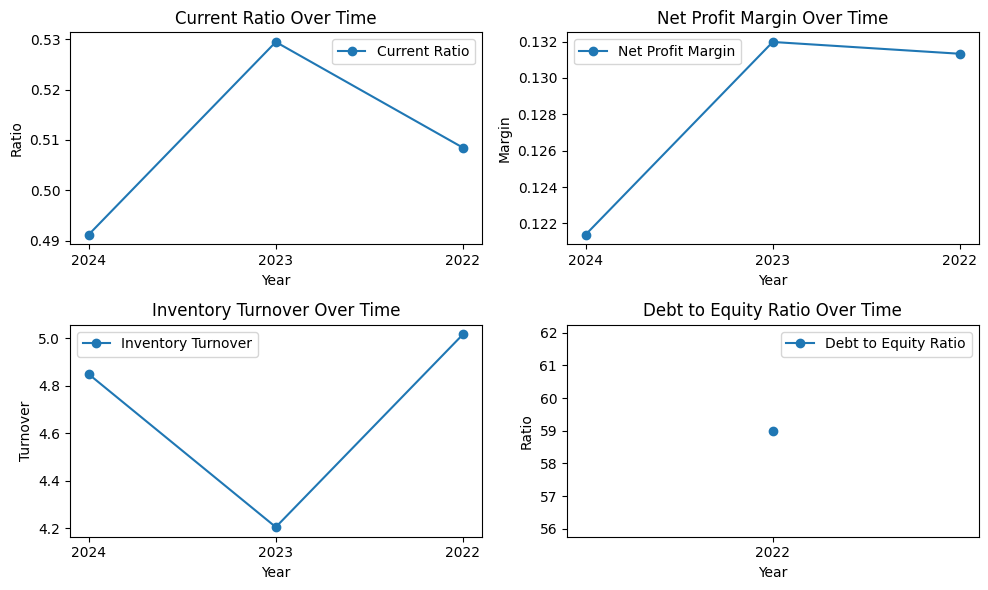

In [62]:
# Plot ratios
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(years, current_ratio, marker='o', label='Current Ratio')
plt.title('Current Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(years, net_profit_margin, marker='o', label='Net Profit Margin')
plt.title('Net Profit Margin Over Time')
plt.xlabel('Year')
plt.ylabel('Margin')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(years, inventory_turnover, marker='o', label='Inventory Turnover')
plt.title('Inventory Turnover Over Time')
plt.xlabel('Year')
plt.ylabel('Turnover')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(years, debt_to_equity_ratio, marker='o', label='Debt to Equity Ratio')
plt.title('Debt to Equity Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()

plt.tight_layout()
plt.show()